In [1]:
import pandas as pd

# Objective : Prediction task is to determine whether a person makes over 50K a year.

##  Step1: Import Dependenceis 

In [2]:
# imports

import pandas as pd # to handle pandas dataframe
import matplotlib.pyplot as plt # to visualize the data 
import numpy as np # to perfrom numeric cal
import seaborn as sns # for better plots
from sklearn.preprocessing import StandardScaler  # data normalization
from scipy.stats import skew # to check the skew 

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline 
pd.set_option("display.max_columns", None)

## Step 2: Load DataSet

In [3]:
adult_df = pd.read_csv(r'adult_data.csv',
                       header = None,
                       delimiter=' *, *') # to remove leading and lagging space

adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                    'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss',
                    'hours_per_week', 'native_country', 'income']

adult_df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
adult_df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
adult_df.shape

(32561, 15)

## Step 3: EDA

In [7]:
def create_piechart(data, column):
    """
    Objective
    ---------- 
    Create Pichart for Categorical varaibles present in Pandas Dataframe
    
    parameters
    ----------
    data: this is pandas dataframe
    column: this is column name which is used to create plot
        
    returns
    ----------
    this will show piechart
    
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
   
    plt.pie(sizes, 
            labels=labels, 
            autopct='%1.2f%%',
            shadow=False, 
            startangle=45)
    
    plt.axis('equal')  
    plt.title("Piechart - {}".format(column))
    plt.show()
    
    
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
    
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data

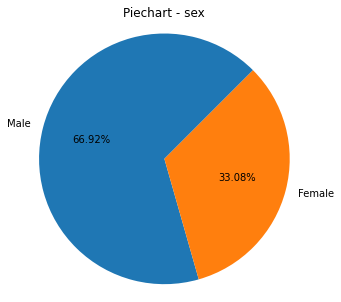

In [8]:
plt.figure(figsize=(5,5))
create_piechart(adult_df, "sex")

- We have 33% female employee and 67% male employee

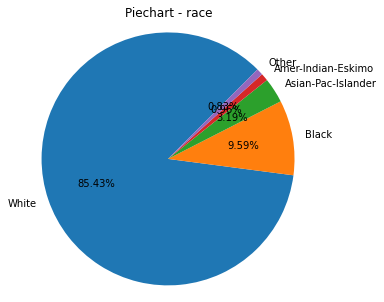

In [9]:
plt.figure(figsize=(5,5))
create_piechart(adult_df, "race")

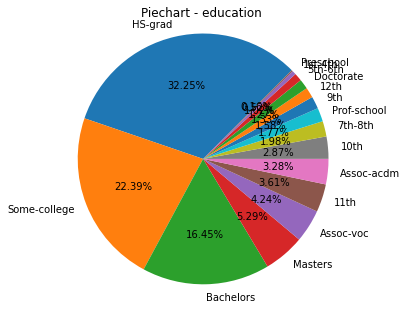

In [10]:
plt.figure(figsize=(5,5))
create_piechart(adult_df, "education")

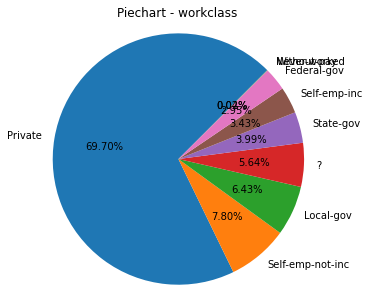

In [11]:
plt.figure(figsize=(5,5))
create_piechart(adult_df, "workclass")

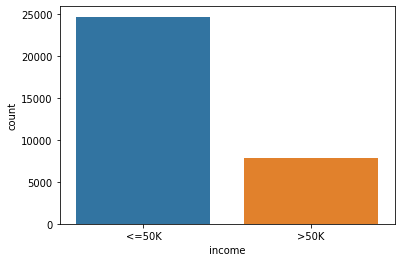

In [12]:
sns.countplot(x=adult_df["income"])
plt.show()

## Step 4: Data Preprocessing

In [13]:
#create a copy of the dataframe
adult_df_rev = pd.DataFrame.copy(adult_df)

In [14]:
adult_df_rev = adult_df_rev.drop(["education","fnlwgt"], axis=1)

In [15]:
adult_df_rev.shape

(32561, 13)

In [16]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
for i in adult_df_rev.columns:
    print(i, "--"*25)
#     print(adult_df_rev[i].unique())
    print(adult_df_rev[i].value_counts())
    print()

age --------------------------------------------------
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

workclass --------------------------------------------------
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education_num --------------------------------------------------
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

marital_status --------------------------------------------------
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated            

In [18]:
adult_df_rev=adult_df_rev.replace(['?'], np.nan)

In [19]:
missing_data(adult_df_rev)

,Total,Percent,Data_Type
occupation,1843,5.66,object
workclass,1836,5.64,object
native_country,583,1.79,object
age,0,0.00,int64
education_num,0,0.00,int64
marital_status,0,0.00,object
relationship,0,0.00,object
race,0,0.00,object
sex,0,0.00,object
capital_gain,0,0.00,int64


- If any column contain missing values more than 50% then drop the entire column because we cant impute 50% missing data 
- if any column contain missing values less than 40% then treat the columns 
    - if the column contain less than 40% missing values and data type is continous numerical data and distribution is normal then replace the missing values with mean 
    - if the column contain less than 40% missing values and data type is continous numerical data and distribution is skewd then replace the missing values with median 
    - or in few cased you can replace with mean or median 
    - if the column contain less than 40% missing values and data type is categorical data then replace the missing values with mode 
    - in some cases we can use fixed and constant value to replace the missing data  

<AxesSubplot:>

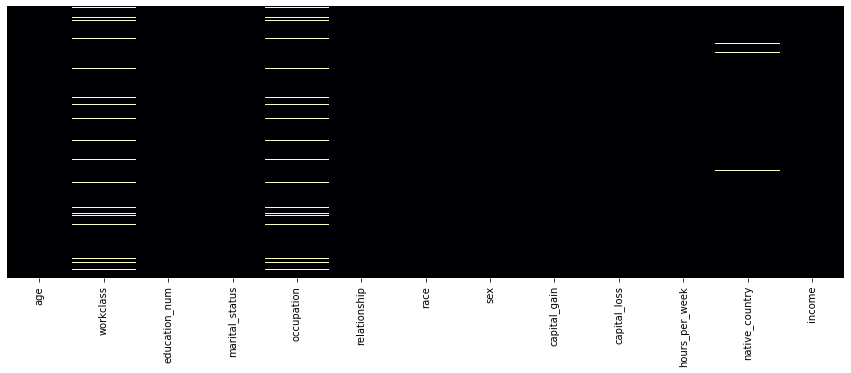

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(adult_df_rev.isnull(), 
            cbar = False, 
            yticklabels=False, 
            cmap="magma" )

In [21]:
adult_df_rev["workclass"].mode()

0    Private
dtype: object

In [22]:
print(adult_df_rev["workclass"].mode()[0])
print(adult_df_rev["occupation"].mode()[0])
print(adult_df_rev["native_country"].mode()[0])

Private
Prof-specialty
United-States


In [23]:
# replace the missing values with mode values
for value in ['workclass', 'occupation','native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],
                               inplace=True)

<AxesSubplot:>

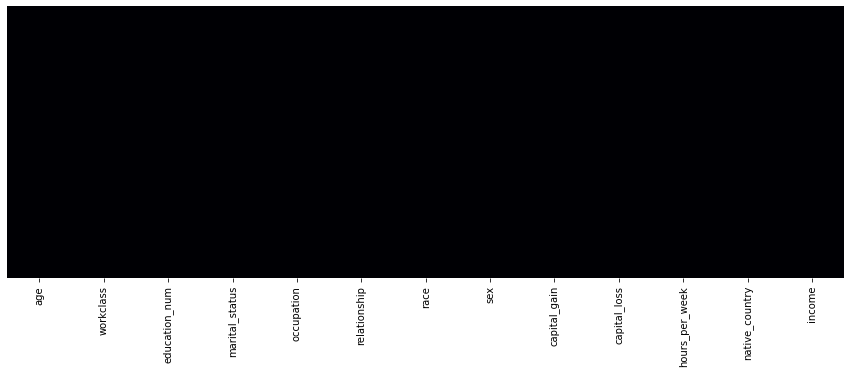

In [24]:

plt.figure(figsize=(15,5))
sns.heatmap(adult_df_rev.isnull(), 
            cbar = False, 
            yticklabels=False, cmap="magma" )

In [25]:
adult_df_rev.isnull().sum()
#adult_df_rev.head()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [26]:

# for x in adult_df_rev.columns:
    
#     if adult_df_rev[x].dtype=='object' or adult_df_rev[x].dtype=='bool':
#         adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
        
        
#     elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
#         adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)

In [27]:

colname_cat = ['workclass', 
          'marital_status', 'occupation',
          'relationship','race', 'sex',
          'native_country', 'income']

colname_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [28]:
adult_df_rev[colname_cat]

,workclass,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [29]:
colname_cat=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname_cat.append(x)
colname_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [30]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Encoding Techniques

### 1. Using Dummy varibales

In [31]:
adult_df_rev_new = pd.get_dummies(adult_df_rev,  drop_first = True)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native_country_Canada,native_country_China,native_country_Columbia,native_country_Cuba,native_country_Dominican-Republic,native_country_Ecuador,native_country_El-Salvador,native_country_England,native_country_France,native_country_Germany,native_country_Greece,native_country_Guatemala,native_country_Haiti,native_country_Holand-Netherlands,native_country_Honduras,native_country_Hong,native_country_Hungary,native_country_India,native_country_Iran,native_country_Ireland,native_country_Italy,native_country_Jamaica,native_country_Japan,native_country_Laos,native_country_Mexico,native_country_Nicaragua,native_country_Outlying-US(Guam-USVI-etc),native_country_Peru,native_country_Philippines,native_country_Poland,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,39,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
adult_df_rev_new.shape

(32561, 82)

### 2. OneHotEncoder

In [33]:
from sklearn import preprocessing
# pass only categorical data
le = preprocessing.OneHotEncoder()
adult_df_rev_cat = pd.DataFrame(le.fit_transform(adult_df_rev[colname_cat]).toarray())

In [34]:
# fit  -> decison making  
# transofrom  -> change data as per decision
# fit_transform -> do both at one step

In [35]:
adult_df_rev_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
adult_df_rev_cat.shape

(32561, 85)

In [37]:
colname_num=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype!='object':
        colname_num.append(x)
colname_num


['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

In [38]:
adult_df_rev_num = adult_df_rev[colname_num]

In [39]:
adult_df_rev_num.head()

,age,education_num,capital_gain,capital_loss,hours_per_week
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40


In [40]:
adult_df_rev_new=pd.concat([adult_df_rev_num, adult_df_rev_cat], axis=1)
adult_df_rev_new.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,39,13,2174,0,40,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,13,0,0,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,9,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,7,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,13,0,0,40,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
adult_df_rev_new.shape

(32561, 90)

### 3. Label Encoder

In [42]:
colname_cat=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname_cat.append(x)
colname_cat

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [43]:
# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname_cat:
    adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
  
    print()
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)


Feature workclass
mapping {'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}

Feature marital_status
mapping {'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}

Feature occupation
mapping {'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}

Feature relationship
mapping {'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}

Feature race
mapping {'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White': 4}

Feature sex
mapping {'Female': 0, 'Male': 1}

Feature native_country
mapping {'Cambodia': 0, '

In [44]:
adult_df_rev.head()
#0--> <=50K
#1--> >50K

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [45]:
adult_df_rev.shape

(32561, 13)

In [46]:
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


### Spliting data into Depedent and Independent 

In [47]:
# values function create array and iloc creates dataframe so use values 
# if you large data which is faster
X = adult_df_rev.values[:, 0:-1]
y = adult_df_rev.values[:,-1]

In [48]:
X.shape, y.shape

((32561, 12), (32561,))

### Spliting Data Into train test

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=24)  
print("Train Size: ", X_train.shape, y_train.shape)
print("Test Size: ", X_test.shape, y_test.shape)

Train Size:  (22792, 12) (22792,)
Test Size:  (9769, 12) (9769,)


### Data Scaling 

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# mean = 0 and std = 1
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
# convert y into int
y=y.astype(int) # 1 0 " 1"

In [52]:
X_train_scale

array([[0.02739726, 0.42857143, 0.6       , ..., 0.        , 0.39795918,
        0.95      ],
       [0.10958904, 0.42857143, 0.53333333, ..., 0.        , 0.34693878,
        0.95      ],
       [0.46575342, 0.42857143, 0.53333333, ..., 0.        , 0.45918367,
        0.95      ],
       ...,
       [0.65753425, 0.42857143, 0.4       , ..., 0.        , 0.19387755,
        0.95      ],
       [0.15068493, 0.42857143, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.10958904, 0.42857143, 0.53333333, ..., 0.        , 0.39795918,
        0.95      ]])

## Running a basic model

In [53]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [54]:
%%time
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train_scale, y_train)

Wall time: 552 ms


LogisticRegression()

In [55]:
#predict using the model
y_pred=classifier.predict(X_test_scale)
print(list(zip(y_test,y_pred)))

[(0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 1), (0, 0),

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [57]:
accuracy_score(y_true=y_test,
               y_pred=y_pred)

0.8191217115364929

In [58]:
confusion_matrix(y_true=y_test,
               y_pred=y_pred)

array([[6952,  423],
       [1344, 1050]], dtype=int64)

In [59]:
print(classification_report(y_true=y_test,
               y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.71      0.44      0.54      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.80      9769



In [60]:
def model_evaluation(y_test, y_pred):   # https://justpaste.it/fm77x
    """
    objective: to evalute model performance
    
    parmas:
        y_test: 
        y_pred: 
    """
    print("------------- Confusion Matrix-------------")
    print(confusion_matrix(y_true=y_test,
               y_pred=y_pred))
    print("------------- Classification Report -------------")
    print(classification_report(y_true=y_test,
               y_pred=y_pred))
    print("------------- Accuracy Score  -------------")
    print(accuracy_score(y_true=y_test,
               y_pred=y_pred))

In [61]:
model_evaluation(y_test, y_pred)

------------- Confusion Matrix-------------
[[6952  423]
 [1344 1050]]
------------- Classification Report -------------
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.71      0.44      0.54      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.80      9769

------------- Accuracy Score  -------------
0.8191217115364929


In [62]:
print(list(zip(adult_df_rev.columns[:-1], classifier.coef_.ravel())))
print(classifier.intercept_)

[('age', 2.574206486604815), ('workclass', -0.5907031781706107), ('education_num', 4.966550475237702), ('marital_status', -1.3322250382401786), ('occupation', -0.10380228099416014), ('relationship', -0.544703929696334), ('race', 0.469462264271138), ('sex', 0.8791382764020345), ('capital_gain', 16.319396917594887), ('capital_loss', 2.471723817099543), ('hours_per_week', 2.9676232294454765), ('native_country', 0.10899963535272543)]
[-6.82899682]


In [63]:
adult_df_rev["income"].value_counts() # to check imbalance data 

0    24720
1     7841
Name: income, dtype: int64

In [64]:
# Helper function to plot cunfusion matrix and classification report 

def plot_confusion_metrix(y_true, y_pred,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """
    Objective
    ----------
    plot confussion matrix, classification report and accuracy score
    
    parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    classes : list
        List of labels to index the matrix
        
    title : title for matrix
    cmap : colormap for matrix 
    
    returns 
    ----------
   all accruacy matrix 
    """
    
    
    cm = confusion_matrix(y_true,y_pred)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")

    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
    print("-----------------------------------------------------")
    print('Classification report')
    print(classification_report(y_true,y_pred))
    
    acc= accuracy_score(y_true,y_pred)
    print("Accuracy of the model: ", acc)

    
    

Confusion Matrix, Without Normalisation


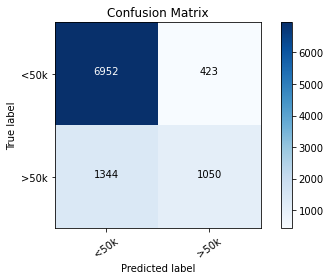

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.71      0.44      0.54      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.80      9769

Accuracy of the model:  0.8191217115364929


In [65]:
import matplotlib.pyplot as plt
import itertools

plot_confusion_metrix(y_test, y_pred, classes=["<50k", ">50k"])

Normalized Confusion Matrix


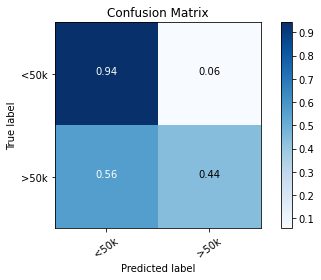

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.71      0.44      0.54      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.80      9769

Accuracy of the model:  0.8191217115364929


In [66]:
plot_confusion_metrix(y_test, y_pred, classes=["<50k", ">50k"], normalize=True)

## GradientBoosting 

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [68]:
def model_building(model, X_train, y_train, X_test, y_test, classes=["<50k", ">50k"]):
    
    cls = model
    cls.fit(X_train, y_train)
    y_pred=cls.predict(X_test)

    plot_confusion_metrix(y_test, y_pred, classes=classes)

Confusion Matrix, Without Normalisation


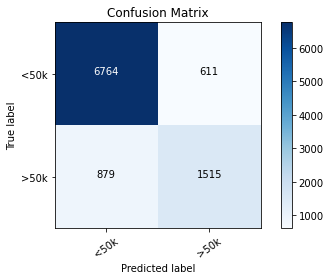

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7375
           1       0.71      0.63      0.67      2394

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.79      9769
weighted avg       0.84      0.85      0.84      9769

Accuracy of the model:  0.8474767120483161


In [69]:
model = RandomForestClassifier()

model_building(model, 
               X_train_scale, 
               y_train,
               X_test_scale,
               y_test)

Confusion Matrix, Without Normalisation


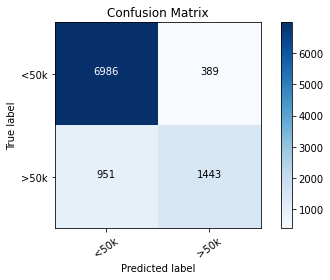

-----------------------------------------------------
Classification report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7375
           1       0.79      0.60      0.68      2394

    accuracy                           0.86      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769

Accuracy of the model:  0.8628314054662709


In [70]:
model = GradientBoostingClassifier()

model_building(model, 
               X_train_scale, 
               y_train,
               X_test_scale,
               y_test)

**Adjusting the threshold**

In [72]:
y_pred[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [73]:
# store the predicted probabilities
y_pred_prob = classifier.predict_proba(X_test_scale)
print(y_pred_prob[:15])

[[0.76864589 0.23135411]
 [0.8862759  0.1137241 ]
 [0.87494043 0.12505957]
 [0.95159559 0.04840441]
 [0.94122102 0.05877898]
 [0.96792802 0.03207198]
 [0.9780213  0.0219787 ]
 [0.82651916 0.17348084]
 [0.93462044 0.06537956]
 [0.735303   0.264697  ]
 [0.90222548 0.09777452]
 [0.97832892 0.02167108]
 [0.76246562 0.23753438]
 [0.97334918 0.02665082]
 [0.65643534 0.34356466]]


In [88]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.4:            # [0.45 0.6]
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
acc=accuracy_score(y_test, y_pred_class)
print(classification_report(y_test, y_pred_class))
print("Accuracy of the model: ",acc)

[[6654  721]
 [1033 1361]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.88      7375
           1       0.65      0.57      0.61      2394

    accuracy                           0.82      9769
   macro avg       0.76      0.74      0.75      9769
weighted avg       0.81      0.82      0.82      9769

Accuracy of the model:  0.8204524516327157


In [91]:
for a in np.arange(0.3,0.71,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=round(cfm[0,1]+cfm[1,0])
    print("Threshold: {} TotalER: {}  Type 2: {}   Type 1: {}".format(round(a,2), total_err, cfm[1,0], cfm[0,1]))    
#     print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
#           cfm[1,0]," , type 1 error:", cfm[0,1])

Threshold: 0.3 TotalER: 2011  Type 2: 714   Type 1: 1297
Threshold: 0.31 TotalER: 1966  Type 2: 746   Type 1: 1220
Threshold: 0.32 TotalER: 1936  Type 2: 777   Type 1: 1159
Threshold: 0.33 TotalER: 1913  Type 2: 806   Type 1: 1107
Threshold: 0.34 TotalER: 1881  Type 2: 836   Type 1: 1045
Threshold: 0.35 TotalER: 1850  Type 2: 868   Type 1: 982
Threshold: 0.36 TotalER: 1824  Type 2: 902   Type 1: 922
Threshold: 0.37 TotalER: 1809  Type 2: 939   Type 1: 870
Threshold: 0.38 TotalER: 1783  Type 2: 967   Type 1: 816
Threshold: 0.39 TotalER: 1758  Type 2: 995   Type 1: 763
Threshold: 0.4 TotalER: 1754  Type 2: 1033   Type 1: 721
Threshold: 0.41 TotalER: 1751  Type 2: 1070   Type 1: 681
Threshold: 0.42 TotalER: 1739  Type 2: 1095   Type 1: 644
Threshold: 0.43 TotalER: 1742  Type 2: 1124   Type 1: 618
Threshold: 0.44 TotalER: 1755  Type 2: 1164   Type 1: 591
Threshold: 0.45 TotalER: 1753  Type 2: 1185   Type 1: 568
Threshold: 0.46 TotalER: 1740  Type 2: 1210   Type 1: 530
Threshold: 0.47 Total

- END

# AUC and ROC Curve

In [92]:
from sklearn import metrics
fpr, tpr, z = metrics.roc_curve(y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)
print(auc)

0.852555937867267


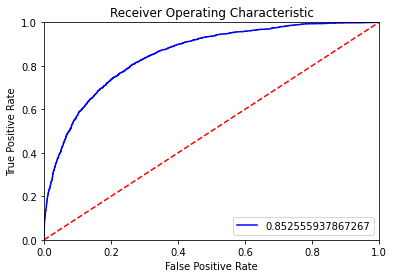

In [93]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [94]:
from sklearn import metrics
#y_pred_class is the list of predicted values on the basis of 0.46 threshold
fpr, tpr,z = metrics.roc_curve(y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.7353709414779889
[0.         0.09776271 1.        ]
[0.         0.56850459 1.        ]


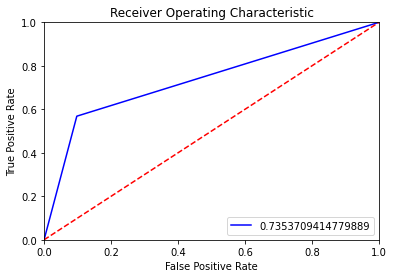

In [95]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

AUC:
1. Find out the overall AUC of the model by passing the entire prob matrix to the roc_curve function. It will try and test various different thresholds and end up giving a proper ROC curve.
2. Try generating the AUC value on the basis of individual thresholds.(try only upon the ambiguous thresholds which end up giving you almost the same error)
3. Finally conclude upon the threshold which gives you an AUC closest to the overall AUC.



- AUC <= 0.5 worst
- 0.5 - 0.6 -> Poor 
- 0.6 - 0.7 -> bad
- 0.7 - 0.8 -> good 
- 0.8 - 0.9 -> V.good
- 0.9 - 1.0 -> Excellent


calculate AUC of at different Threshould level and 
compare AUC of main model and select the model which are close to main model AUC
so this is how AUC can help you to select the best threshould for your model





**Running model using cross validation**

In [ ]:
#Using cross validation
#older version
"""
classifier=(LogisticRegression())
from sklearn import cross_validation
#performing kfold_cross_validation
kfold_cv=cross_validation.KFold(n=len(X_train),n_folds=10)
print(kfold_cv)

#running the model using scoring metric as accuracy
kfold_cv_result=cross_validation.cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())


for train_value, test_value in kfold_cv:
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

"""

In [96]:
#Using cross validation

classifier = LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold

kfold_cv=KFold(n_splits=10,
               random_state=10, 
               shuffle=True)
print(kfold_cv)

KFold(n_splits=10, random_state=10, shuffle=True)


In [97]:
from sklearn.model_selection import cross_val_score

#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,
                                X=X_train_scale,
                                y=y_train, 
                                cv=kfold_cv)

print(kfold_cv_result)

#finding the mean
print(kfold_cv_result.mean())

[0.84078947 0.82675439 0.80912681 0.81702501 0.81175954 0.82053532
 0.83106626 0.83194384 0.82623958 0.82229048]
0.8237530695980848


In [ ]:
#model tuning
classifier = LogisticRegression()

for train_value, test_value in kfold_cv.split(X_train_scale):
    
    classifier.fit(X_train_scale[train_value], y_train[train_value]).predict(X_train_scale[test_value])

    
y_pred=classifier.predict(X_test_scale)
#print(list(zip(Y_test,Y_pred)))

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(y_test, y_pred)
print(cfm)
print()


print("Classification report: ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)


[[6952  423]
 [1344 1050]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7375
           1       0.71      0.44      0.54      2394

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.80      9769

Accuracy of the model:  0.8191217115364929


**Feature selection using Recursive Feature Elimination**

> Recursive Feature Elimination:

- 1st-All the independent variables (X) will be considered and the model will be built. It will eliminate the variable which has the least significance in the model.

- 2nd-(X-1) variables will be considered and the model will be rebuilt.
The process continues till the time we are left off with the given no of variables in the model.
RFE model will be ready to predict upon the testing data.


In [99]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

#print(X)

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [101]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)  


In [102]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=(LogisticRegression())


In [103]:
import warnings
warnings.filterwarnings("ignore")

In [104]:
colname=adult_df_rev.columns

In [111]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=classifier, n_features_to_select=8, verbose=1)
model_rfe = rfe.fit(X_train, Y_train)
print("Num Features: ",model_rfe.n_features_)
print("Selected Features: ") 
print(list(zip(colname, model_rfe.support_)))
print("Feature Ranking: ", model_rfe.ranking_) 

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Num Features:  8
Selected Features: 
[('age', True), ('workclass', False), ('education_num', True), ('marital_status', True), ('occupation', False), ('relationship', True), ('race', False), ('sex', True), ('capital_gain', True), ('capital_loss', True), ('hours_per_week', True), ('native_country', False)]
Feature Ranking:  [1 3 1 1 4 1 2 1 1 1 1 5]


In [112]:
Y_pred=model_rfe.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()


print("Classification report: ")

print(classification_report(Y_test,Y_pred))

accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)


[[7011  412]
 [1323 1023]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7423
           1       0.71      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8223973794656567


In [ ]:
"""new_data=adult_df_rev[['age','workclass','occupation','sex','income']]
new_data.head()
new_X=new_data.values[:,:-1]
new_Y=new_data.values[:,-1]
print(new_X)
print(new_Y)
"""

# Using SGD Classifier

In [114]:
from sklearn.linear_model import SGDClassifier
#create a model
classifier=SGDClassifier(loss="log",random_state=10,eta0=0.00001,alpha=0.01,max_iter=1000)
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(list(zip(adult_df_rev.columns[:-1],classifier.coef_.ravel())))
#print(classifier.intercept_)

[('age', 0.44659067791407864), ('workclass', -0.09947412240162157), ('education_num', 0.772855492013331), ('marital_status', -0.3086473611303162), ('occupation', -0.005413503779237489), ('relationship', -0.21683148349589607), ('race', 0.11079970854703876), ('sex', 0.37717184941620624), ('capital_gain', 1.1556418714815848), ('capital_loss', 0.22867100135333865), ('hours_per_week', 0.3574615160836565), ('native_country', 0.008893588082715863)]


In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[7051  372]
 [1346 1000]]
Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.73      0.43      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.71      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model:  0.8241375780530249


**Feature selection using Univariate Selection**

In [ ]:
X = adult_df_rev.values[:,:-1]
y = adult_df_rev.values[:,-1]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

colname =  adult_df_rev.columns
test = SelectKBest(score_func=chi2, k=3)
fit1 = test.fit(X, y)

print(fit1.scores_)
print(list(zip(colname,fit1.get_support())))
X = fit1.transform(X)

# print(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=10)  


In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier= LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)  # https://justpaste.it/bsvfj

In [ ]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(2)
fit1 = vt.fit(X, Y)
print(fit1.variances_)

features = fit1.transform(X)
print(features)
print(features.shape[1])
print(list(zip(colname,fit1.get_support())))

In [ ]:
X = adult_df_rev.values[:,:-1]
Y = adult_df_rev.values[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)  


In [ ]:
import statsmodels.api as sm
#Build Logit Model
logit = sm.Logit(Y_train,X_train)

# fit the model
model1 = logit.fit()

# Prining Logistic Regression model results 
model1.summary2()

In [ ]:
# Predict values using test data
Y_pred = model1.predict(X_test)
print(Y_pred)

In [ ]:
# Making y_pred as DataFrame
predicted_df = pd.DataFrame(Y_pred)
predicted_df.head(5)

In [ ]:
# assigning the class 0 and 1 based on threshold value 0.5
predicted_df['Predicted_Class'] = np.where(predicted_df[0]>= 0.50,1,0)
predicted_df.head(5)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,predicted_df.Predicted_Class)
print(confusion_matrix)
print()


print("Classification report: ")

print(classification_report(Y_test,predicted_df.Predicted_Class))

accuracy_score=accuracy_score(Y_test, predicted_df.Predicted_Class)
print("Accuracy of the model: ",accuracy_score)

In [ ]:
#https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [ ]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/